# APRENDIZAJE POR REFUERZO

## Entorno GridWorlds: Estados, Acciones y Recompensas

En este entorno, el agente se desplaza sobre una cuadr√≠cula donde cada casilla representa un estado. Puede moverse en cuatro direcciones (arriba, abajo, izquierda, derecha), aunque algunas casillas restringen el movimiento o afectan la recompensa. Las recompensas y restricciones dependen del tipo de casilla:

- **Negro:** Casilla vac√≠a, sin recompensa.
- **Blanco:** Foso, gran penalizaci√≥n y termina el episodio.
- **P√∫rpura:** Muro, el agente no puede entrar.
- **Negro con flecha gris:** Solo permite moverse en una direcci√≥n.
- **Rojo:** Penalizaci√≥n (recompensa negativa).
- **Verde:** Meta o bonificaci√≥n (recompensa positiva).
- **Amarillo:** Arena movediza; 90% de las acciones fallan.
- **Azul:** Posici√≥n actual del agente.
- **Flecha naranja:** √öltima acci√≥n realizada.
- **Punto naranja:** El agente no se movi√≥ tras la √∫ltima acci√≥n (acci√≥n inv√°lida).

El objetivo del agente es aprender a llegar a la meta (verde) maximizando la recompensa total y evitando fosos y penalizaciones.


#INTEGRANTES DEL GRUPO:

 * Amurrio Huaygua Karen
 * Manjon Blanco Susana

In [1]:
# Instala gym_gridworlds directamente desde GitHub
!pip install git+https://github.com/sparisi/gym_gridworlds.git



  Cloning https://github.com/sparisi/gym_gridworlds.git to /tmp/pip-req-build-c2_e4c3b
  Running command git clone --filter=blob:none --quiet https://github.com/sparisi/gym_gridworlds.git /tmp/pip-req-build-c2_e4c3b
  Resolved https://github.com/sparisi/gym_gridworlds.git to commit 720cc8e7ac1a2f80234ba4082f2063e894e9a33c
  Preparing metadata (setup.py) ... done
  Created wheel for Gym-Gridworlds: filename=Gym_Gridworlds-1.0-py3-none-any.whl size=15679 sha256=129b48397ecdf64af33097eeb0d33ecf6476cf05b876fac576b21d49e26cec26
  Stored in directory: /tmp/pip-ephem-wheel-cache-s8mk91l2/wheels/5e/53/bd/f04c982a026f7f1a41035c5d022ca6c53491085b3420959bd8
Successfully built Gym-Gridworlds


## M√©todos de acci√≥n-valor

El agente estima el valor esperado de cada accion con base a las recompensas que ha recibido.
siempre busca elegir la mejor accion a tomar de acuerdo a la mejor recompensa que recibe.
* Si epsilon es grande -> mas probabilidad de explorar
* Si epsilon es peque√±o -> mas probabilidad de explotar


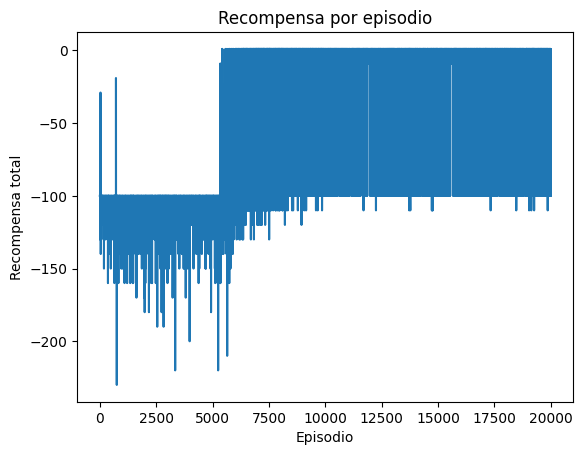

Entrenamiento terminado.


In [3]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt

env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n

alpha = 0.8
gamma = 0.95
epsilon = 1.0
episodes = 20000
epsilon_end = 0.05
epsilon_decay = 0.9995

Q = np.zeros((n_states, n_actions))
rewards_ep = []

for ep in range(episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        # Forzar exploraci√≥n los primeros 5,000 episodios
        if ep < 5000 or np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[obs])
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Gran recompensa si llega a la meta
         #Se da la recompen
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        done = terminated or truncated
        total_reward += reward
    # Decaimiento lento
    if ep >= 5000:
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
    rewards_ep.append(total_reward)

env.close()
plt.plot(rewards_ep)
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Recompensa por episodio")
plt.show()
print("Entrenamiento terminado.")

# Visualizaci√≥n: GREEDY (camino √≥ptimo)
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset()
frames = [env.render()]
done = False
while not done:
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    done = terminated or truncated

env.close()

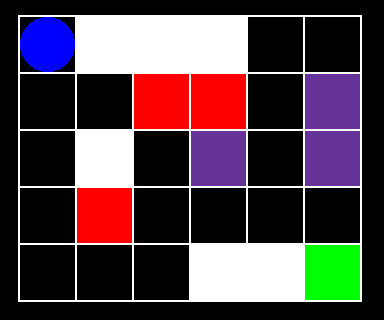

In [4]:
# Opcional: guarda GIF
import imageio
imageio.mimsave('gridworld_greedy.gif', frames, duration=0.1)
from IPython.display import Image
Image(filename="gridworld_greedy.gif")

In [ ]:
total_rewards = []

for ep in range(episodes):
    obs, info = env.reset(seed=ep)   # Puedes variar o quitar el seed si prefieres aleatoriedad
    done = False
    total_reward = 0
    llego_meta = False

    while not done:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[obs])
        next_obs, reward, terminated, truncated, info = env.step(action)
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        total_reward += reward

        # Verifica si lleg√≥ a la meta (terminated y recompensa positiva)
        if terminated and reward > 0:
            llego_meta = True

        obs = next_obs
        done = terminated or truncated

    epsilon = max(epsilon_end, epsilon * epsilon_decay)

    # ---- IMPRIME RESULTADO DEL EPISODIO ----
    if llego_meta:
        print(f"Episodio {ep+1}: ¬°GAN√ì! Recompensa total: {total_reward}")
    else:
        print(f"Episodio {ep+1}: PERDI√ì o NO LLEG√ì. Recompensa total: {total_reward}")

    total_rewards.append(total_reward)


Se truncaron las √∫ltimas l√≠neas 5000 del resultado de transmisi√≥n.
Episodio 15001: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15002: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15003: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15004: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15005: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15006: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15007: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15008: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15009: PERDI√ì o NO LLEG√ì. Recompensa total: -100.0
Episodio 15010: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15011: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15012: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15013: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15014: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15015: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15016: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15017: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15018: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15019: ¬°GAN√ì! Recompensa total: 1.0
Episodio 15020: ¬°GAN√

## Implementaci√≥n incremental

Permite actualizar el promedio usando solo el valor anterior y la nueva recompensa

La f√≥rmula que pusiste es:

ùëÑ
ùëõ
+
1
=
ùëÑ
ùëõ
+
ùõº
(
ùëÖ
ùëõ
‚àí
ùëÑ
ùëõ
)
Q
n+1
‚Äã
 =Q
n
‚Äã
 +Œ±(R
n
‚Äã
 ‚àíQ
n
‚Äã
 )
Donde:

ùëÑ
ùëõ
Q
n
‚Äã
  = valor estimado despu√©s de n actualizaciones

ùëÖ
ùëõ
R
n
‚Äã
  = recompensa obtenida en la vez n

ùõº
Œ± = tasa de aprendizaje (learning rate), entre 0 y 1

Se truncaron las √∫ltimas l√≠neas 5000 del resultado de transmisi√≥n.
Episodio 6260, paso 26: Recompensa = 1.0, Estado = 29
Episodio 6261, paso 13: Recompensa = -100, Estado = 27
Episodio 6262, paso 26: Recompensa = 1.0, Estado = 29
Episodio 6263, paso 1: Recompensa = -100, Estado = 1
Episodio 6264, paso 7: Recompensa = -10.0, Estado = 20
Episodio 6264, paso 17: Recompensa = 1.0, Estado = 29
Episodio 6265, paso 5: Recompensa = -100, Estado = 1
Episodio 6266, paso 1: Recompensa = -100, Estado = 1
Episodio 6267, paso 10: Recompensa = -100, Estado = 13
Episodio 6268, paso 11: Recompensa = -100, Estado = 27
Episodio 6269, paso 5: Recompensa = -100, Estado = 13
Episodio 6270, paso 6: Recompensa = -100, Estado = 13
Episodio 6271, paso 0: Recompensa = -100, Estado = 1
Episodio 6272, paso 1: Recompensa = -100, Estado = 1
Episodio 6273, paso 20: Recompensa = 1.0, Estado = 29
Episodio 6274, paso 12: Recompensa = -100, Estado = 27
Episodio 6275, paso 5: Recompensa = -100, Estado = 1
Episodio 6276

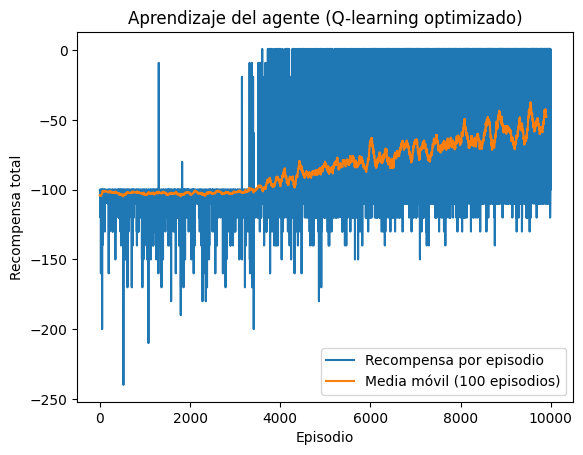

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Configuraci√≥n del entorno
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.1              # Tasa de aprendizaje
gamma = 0.99             # Factor de descuento
episodes = 10000         # Aumentamos el n√∫mero de episodios
max_steps = 100          # M√°ximo de pasos por episodio
epsilon_start = 1.0      # Epsilon inicial (exploraci√≥n total)
epsilon_end = 0.01       # Epsilon final (m√≠nima exploraci√≥n)
epsilon_decay = 0.999    # Decaimiento de epsilon por episodio

# Inicializaci√≥n del entorno y la tabla Q
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

rewards_ep = []

# Entrenamiento
for ep in range(episodes):
    obs, info = env.reset(seed=ep)
    done = False
    total_reward = 0
    # Decaimiento de epsilon
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-ep / (episodes * epsilon_decay))

    for t in range(max_steps):
        # Pol√≠tica Œµ-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploraci√≥n
        else:
            action = np.argmax(Q[obs])         # Explotaci√≥n
        # Paso en el entorno
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Actualizaci√≥n de la tabla Q
        Q[obs, action] = Q[obs, action] + alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        # Depuraci√≥n: Imprimir recompensa y estado
        if reward != 0:
            print(f"Episodio {ep}, paso {t}: Recompensa = {reward}, Estado = {obs}")
        if terminated or truncated:
            break
    rewards_ep.append(total_reward)
    # Imprimir progreso cada 1000 episodios
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (√∫ltimos 100): {np.mean(rewards_ep[-100:]):.2f}, Epsilon: {epsilon:.3f}")

env.close()
print("Entrenamiento terminado con implementaci√≥n incremental (Q-learning optimizado).")

# --- Gr√°fica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio")
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media m√≥vil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning optimizado)")
plt.legend()
plt.show()


In [ ]:

# --- Visualizaci√≥n del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame2 = [env.render()]
path = [obs]  # Para rastrear los estados visitados
for paso in range(1, 101):
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frame2.append(env.render())
    path.append(obs)
env.close()



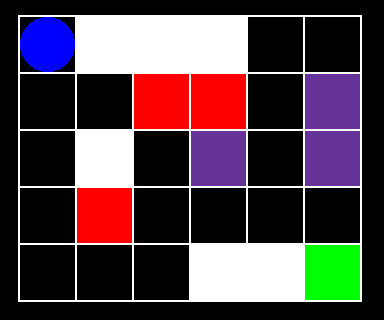

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_optimized.gif', frame2, duration=0.1)
from IPython.display import Image
Image(filename="gridworld_optimized.gif")

# Valores iniciales optimistas

* Este valor inicial influye en c√≥mo aprende el agente al principio, porque afecta qu√© acciones explora o explota.

* En vez de iniciar Q(a) en cero, ponemos todos los valores iniciales en un valor alto, m√°s alto de lo que esperar√≠amos recibir realmente.

  Como el agente piensa que todas las acciones son ‚Äúmuy buenas‚Äù, las ir√° probando todas para comprobar si realmente lo son.

* El agente se queda con la mejor, y explota esa acci√≥n.


Se truncaron las √∫ltimas l√≠neas 5000 del resultado de transmisi√≥n.
Episodio 7336, paso 20: Recompensa = -10.0, Estado = 14
Episodio 7336, paso 31: Recompensa = -100, Estado = 28
Episodio 7336 termin√≥ sin meta (trampa o l√≠mite), Estado = 28
Episodio 7337, paso 3: Recompensa = -100, Estado = 13
Episodio 7337 termin√≥ sin meta (trampa o l√≠mite), Estado = 13
Episodio 7338, paso 10: Recompensa = -100, Estado = 27
Episodio 7338 termin√≥ sin meta (trampa o l√≠mite), Estado = 27
Episodio 7339, paso 19: Recompensa = 1.0, Estado = 29
Episodio 7340, paso 28: Recompensa = 1.0, Estado = 29
Episodio 7341, paso 23: Recompensa = 1.0, Estado = 29
Episodio 7342, paso 4: Recompensa = -100, Estado = 13
Episodio 7342 termin√≥ sin meta (trampa o l√≠mite), Estado = 13
Episodio 7343, paso 6: Recompensa = -100, Estado = 13
Episodio 7343 termin√≥ sin meta (trampa o l√≠mite), Estado = 13
Episodio 7344, paso 19: Recompensa = -100, Estado = 28
Episodio 7344 termin√≥ sin meta (trampa o l√≠mite), Estado = 28
E

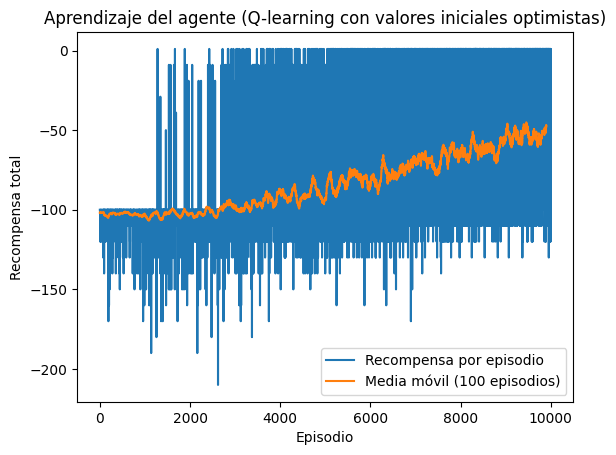

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Par√°metros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.2              # Tasa de aprendizaje reducida para estabilidad
gamma = 0.99             # Factor de descuento
Q_init = 1.0             # Valor inicial optimista m√°s moderado
episodes = 10000         # N√∫mero de episodios
max_steps = 100          # M√°ximo de pasos por episodio
epsilon_start = 1.0      # Epsilon inicial (exploraci√≥n total)
epsilon_end = 0.01       # Epsilon final (m√≠nima exploraci√≥n)
epsilon_decay = 0.999    # Decaimiento de epsilon por episodio

# Inicializaci√≥n del entorno y la tabla Q
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.ones((n_states, n_actions)) * Q_init  # Valores iniciales optimistas

rewards_ep = []  # Para almacenar las recompensas por episodio

# Entrenamiento
for ep in range(episodes):
    obs, info = env.reset(seed=42 + ep)
    done = False
    total_reward = 0
    # Decaimiento de epsilon
    epsilon = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-ep / (episodes * epsilon_decay))

    for t in range(max_steps):
        # Pol√≠tica Œµ-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploraci√≥n
        else:
            action = np.argmax(Q[obs])         # Explotaci√≥n
        # Paso en el entorno
        next_obs, reward, terminated, truncated, info = env.step(action)
        # Actualizaci√≥n incremental de Q
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        # Depuraci√≥n: Imprimir recompensas no nulas
        if reward != 0:
            print(f"Episodio {ep}, paso {t}: Recompensa = {reward}, Estado = {obs}")
        if terminated or truncated:
            if terminated and reward <= 0:
                print(f"Episodio {ep} termin√≥ sin meta (trampa o l√≠mite), Estado = {obs}")
            break
    rewards_ep.append(total_reward)
    # Imprimir progreso cada 1000 episodios
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (√∫ltimos 100): {np.mean(rewards_ep[-100:]):.2f}, Epsilon: {epsilon:.3f}")

env.close()
print("Entrenamiento terminado con valores iniciales optimistas.")

# --- Gr√°fica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio")
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media m√≥vil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning con valores iniciales optimistas)")
plt.legend()
plt.show()



In [ ]:
# --- Visualizaci√≥n del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame3 = [env.render()]
path = [obs]  # Para rastrear los estados visitados
for paso in range(100):
    action = np.argmax(Q[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frame3.append(env.render())
    path.append(obs)
    if reward > 0:
        print(f"¬°Lleg√≥ a la meta en el paso {paso + 1}!\nRuta: {path}")
        break
    if terminated or truncated:
        print(f"Termin√≥ sin llegar a la meta en el paso {paso + 1}.\nRuta: {path}")
        break
env.close()



¬°Lleg√≥ a la meta en el paso 12!
Ruta: [np.int64(0), np.int64(6), np.int64(12), np.int64(18), np.int64(24), np.int64(25), np.int64(26), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(29), np.int64(29)]


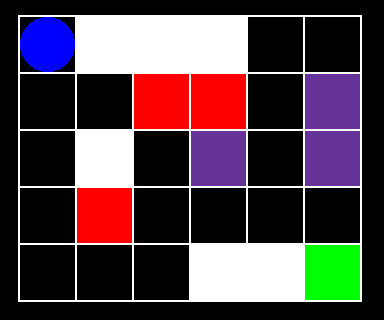

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_optimista.gif', frame3, duration=0.5)
from IPython.display import Image
Image(filename="gridworld_optimista.gif")

# Intervalo de confianza

Priorizar acciones que han sido menos exploradas, pero que pueden ser muy buenas.


El agente balancea explotaci√≥n y exploraci√≥n, pero de forma dirigida:

* Explora m√°s las acciones de las que menos sabe.

* Explota las que han demostrado ser buenas.

Episodio 0, paso 0: Estado (0,0), Acci√≥n 0, Recompensa 0.0
Episodio 0, paso 14: Estado (3,3), Acci√≥n 0, Recompensa -10.0
Episodio 0, paso 16: Estado (2,3), Acci√≥n 2, Recompensa -100
Episodio 0 termin√≥ sin meta (trampa o l√≠mite), √öltimo estado: 13, Ruta: [np.int64(0), np.int64(0), np.int64(6), np.int64(6), np.int64(12), np.int64(12), np.int64(18), np.int64(18), np.int64(24), np.int64(24), np.int64(24), np.int64(25), np.int64(24), np.int64(18), np.int64(19), np.int64(18), np.int64(12), np.int64(13)]
Episodio 1, paso 0: Estado (0,1), Acci√≥n 2, Recompensa -100
Episodio 1 termin√≥ sin meta (trampa o l√≠mite), √öltimo estado: 1, Ruta: [np.int64(0), np.int64(1)]
Episodio 2, paso 0: Estado (0,0), Acci√≥n 3, Recompensa 0.0
Episodio 2, paso 16: Estado (2,3), Acci√≥n 1, Recompensa -100
Episodio 2 termin√≥ sin meta (trampa o l√≠mite), √öltimo estado: 13, Ruta: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(6), np.int64(7), np.int64(6), np.int64(0), np.int64(0), np.int64(0), n

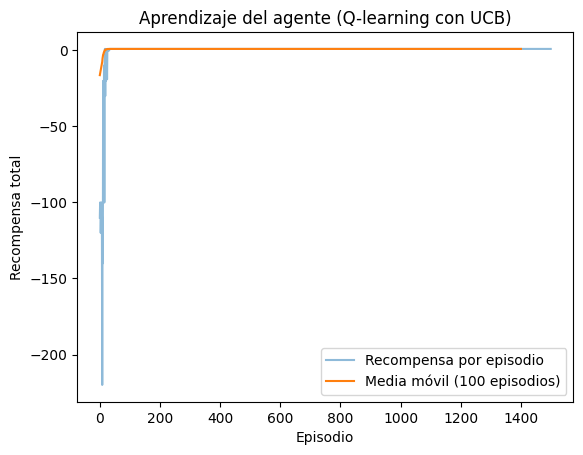

Tabla Q final (valores Q por estado y acci√≥n):
Estado (0,0): [ 9.35891349e-04  6.66728302e+01 -1.00000000e+01  9.35891349e-04
  9.35891349e-04]
Estado (0,1): [0. 0. 0. 0. 0.]
Estado (0,2): [0. 0. 0. 0. 0.]
Estado (0,3): [0. 0. 0. 0. 0.]
Estado (0,4): [-1.00000000e+01  6.18048433e-06  0.00000000e+00  9.41480149e-08
  9.41480149e-08]
Estado (1,0): [9.41480149e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Estado (1,1): [9.38833316e-04 6.75772123e+01 5.92334131e-04 7.05420110e-04
 9.38833316e-04]
Estado (1,2): [ 8.61717019e-04 -1.00000000e+01 -5.17770000e-01 -1.00000000e+01
  5.80988752e-04]
Estado (1,3): [ -3.439     -3.439     -2.71     -10.        -2.997001]
Estado (1,4): [ -2.097901  -1.999     -2.71     -10.        -1.999   ]
Estado (2,0): [-1.88100000e-01  1.49721376e-04  6.18048433e-06  9.41480149e-08
  6.18048433e-06]
Estado (2,1): [0. 0. 0. 0. 0.]
Estado (2,2): [ 8.84921361e-04  6.84907295e+01 -1.00000000e+01  6.22419275e-04
  8.84921361e-04]
Estado (2,3): [0.

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Par√°metros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
alpha = 0.1              # Tasa de aprendizaje reducida para estabilidad
gamma = 0.99             # Factor de descuento
c = 0.5                  # Par√°metro UCB reducido para equilibrar exploraci√≥n
episodes = 1500         # M√°s episodios para asegurar aprendizaje
max_steps = 200          # M√°s pasos por episodio
epsilon = 0.1            # Exploraci√≥n Œµ-greedy adicional como respaldo

# Inicializaci√≥n del entorno
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))  # Tabla Q inicializada en 0
acciones = np.ones((n_states, n_actions))  # Conteo inicial de acciones
rewards_ep = []  # Para almacenar las recompensas por episodio

# Entrenamiento
# ... (todo igual hasta el bucle del entrenamiento)

for ep in range(episodes):
    obs, info = env.reset(seed=42 + ep)
    total_reward = 0
    states_visited = [obs]
    for t in range(max_steps):
        # Selecci√≥n de acci√≥n SOLO con UCB
        ucb_values = Q[obs] + c * np.sqrt(np.log(np.sum(acciones[obs]) + 1) / (acciones[obs] + 1e-6))
        action = np.argmax(ucb_values)
        # Paso y actualizaci√≥n igual que antes
        next_obs, reward, terminated, truncated, info = env.step(action)
        acciones[obs, action] += 1
        Q[obs, action] += alpha * (reward + gamma * np.max(Q[next_obs]) - Q[obs, action])
        obs = next_obs
        total_reward += reward
        states_visited.append(obs)
        # Debug (igual)
        if reward != 0 or t % 50 == 0:
            fila, columna = divmod(obs, 5)
            print(f"Episodio {ep}, paso {t}: Estado ({fila},{columna}), Acci√≥n {action}, Recompensa {reward}")
        if terminated or truncated:
            if terminated and reward <= 0:
                print(f"Episodio {ep} termin√≥ sin meta (trampa o l√≠mite), √öltimo estado: {obs}, Ruta: {states_visited}")
            elif reward > 0:
                print(f"Episodio {ep} lleg√≥ a la meta, √öltimo estado: {obs}, Ruta: {states_visited}")
            break
    rewards_ep.append(total_reward)
    if (ep + 1) % 1000 == 0:
        print(f"Episodio {ep + 1}, Recompensa media (√∫ltimos 100): {np.mean(rewards_ep[-100:]):.2f}")


env.close()
print("Entrenamiento terminado con UCB.")

# --- Gr√°fica de recompensas ---
plt.plot(rewards_ep, label="Recompensa por episodio", alpha=0.5)
plt.plot(np.convolve(rewards_ep, np.ones(100)/100, mode='valid'), label="Media m√≥vil (100 episodios)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.title("Aprendizaje del agente (Q-learning con UCB)")
plt.legend()
plt.show()

# --- Inspecci√≥n de la tabla Q ---
print("Tabla Q final (valores Q por estado y acci√≥n):")
for state in range(n_states):
    fila, columna = divmod(state, 5)
    print(f"Estado ({fila},{columna}): {Q[state]}")
print("Conteo de acciones por estado:")
for state in range(n_states):
    fila, columna = divmod(state, 5)
    print(f"Estado ({fila},{columna}): {acciones[state]}")



In [ ]:
# --- Visualizaci√≥n del recorrido greedy aprendido ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frame4 = [env.render()]
path = [(obs, None, None)]  # (estado, acci√≥n, recompensa)
for paso in range(1, 101):
    action = np.argmax(Q[obs])
    obs_old = obs
    obs, reward, terminated, truncated, info = env.step(action)
    frame4.append(env.render())
    fila, columna = divmod(obs_old, 5)
    print(f"Paso {paso}: Estado ({fila},{columna}), Acci√≥n {action}, Nuevo Estado {obs}, Recompensa {reward}")
    path.append((obs, action, reward))
    if reward > 0:
        print(f"¬°Lleg√≥ a la meta en el paso {paso}!\nRuta: {[(s, a, r) for s, a, r in path]}")
        break
    if terminated or truncated:
        print(f"Termin√≥ sin llegar a la meta en el paso {paso}.\nRuta: {[(s, a, r) for s, a, r in path]}")
        break
env.close()



Paso 1: Estado (0,0), Acci√≥n 1, Nuevo Estado 6, Recompensa 0.0
Paso 2: Estado (1,1), Acci√≥n 1, Nuevo Estado 12, Recompensa 0.0
Paso 3: Estado (2,2), Acci√≥n 1, Nuevo Estado 18, Recompensa 0.0
Paso 4: Estado (3,3), Acci√≥n 1, Nuevo Estado 24, Recompensa 0.0
Paso 5: Estado (4,4), Acci√≥n 2, Nuevo Estado 25, Recompensa 0.0
Paso 6: Estado (5,0), Acci√≥n 2, Nuevo Estado 26, Recompensa 0.0
Paso 7: Estado (5,1), Acci√≥n 3, Nuevo Estado 20, Recompensa 0.0
Paso 8: Estado (4,0), Acci√≥n 2, Nuevo Estado 21, Recompensa 0.0
Paso 9: Estado (4,1), Acci√≥n 2, Nuevo Estado 22, Recompensa 0.0
Paso 10: Estado (4,2), Acci√≥n 2, Nuevo Estado 23, Recompensa 0.0
Paso 11: Estado (4,3), Acci√≥n 1, Nuevo Estado 29, Recompensa 0.0
Paso 12: Estado (5,4), Acci√≥n 4, Nuevo Estado 29, Recompensa 1.0
¬°Lleg√≥ a la meta en el paso 12!
Ruta: [(np.int64(0), None, None), (np.int64(6), np.int64(1), 0.0), (np.int64(12), np.int64(1), 0.0), (np.int64(18), np.int64(1), 0.0), (np.int64(24), np.int64(1), 0.0), (np.int64(25), 

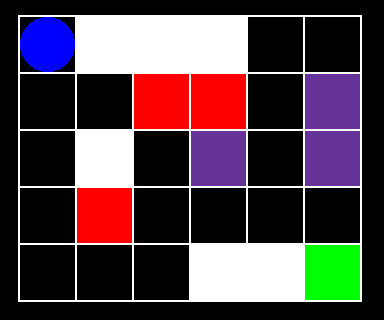

In [ ]:
# Guardar y mostrar el GIF
imageio.mimsave('gridworld_ucb_debug.gif', frame4, duration=0.5)
from IPython.display import Image
Image(filename="gridworld_ucb_debug.gif")

## Algoritmos de Gradiente

 El agente aprende una ‚Äúpreferencia‚Äù para cada acci√≥n.
 El agente elige una acci√≥n al azar usando las probabilidades calculadas con softmax
 * El explorador y explotador a la vez, porque siempre existe una probabilidad de elegir cualquier acci√≥n (softmax nunca es cero).


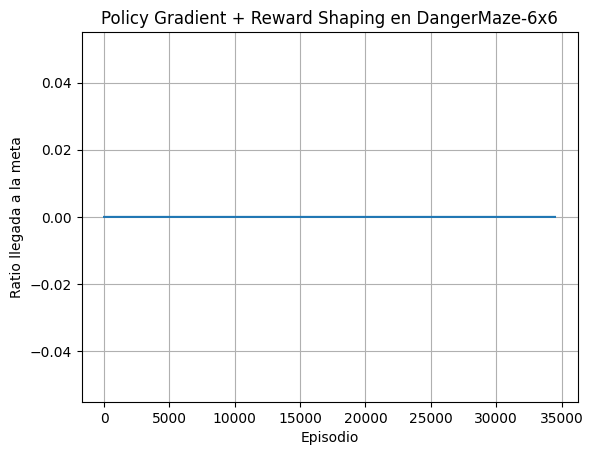

In [ ]:
import gymnasium as gym
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import imageio

def softmax(x):
    x = x - np.max(x)
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

# Par√°metros
env_name = "Gym-Gridworlds/DangerMaze-6x6-v0"
episodes = 35000
max_steps = 200
alpha = 0.2
beta = 0.2
gamma = 1.0
epsilon = 0.2

env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
H = np.random.uniform(-0.01, 0.01, size=(n_states, n_actions))
baseline = 0

rewards_ep = []
success_rate = np.zeros(episodes)

for ep in range(episodes):
    obs, info = env.reset(seed=int(ep))
    trajectory = []
    total_reward = 0
    last_obs = None
    for t in range(max_steps):
        pi = softmax(H[obs])
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.random.choice(np.arange(n_actions), p=pi)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # REWARD SHAPING: Penaliza quedarse quieto (si repite estado, penaliza extra)
        if last_obs is not None and next_obs == last_obs:
            reward -= 0.1  # Penaliza por no moverse

        # Si quiere, se puede dar una peque√±a recompensa por avanzar hacia meta
        # (opcional, quitar si no quieres hacer shaping extra)
        # if next_obs > obs:
        #     reward += 0.01

        trajectory.append((obs, action, reward))
        total_reward += reward
        last_obs = obs
        obs = next_obs
        if terminated or truncated:
            break

    # Calcula retornos acumulados
    G = 0
    returns = []
    for _, _, reward in reversed(trajectory):
        G = reward + gamma * G
        returns.insert(0, G)

    baseline += 0.01 * (total_reward - baseline)

    for idx, (obs_step, action_step, _) in enumerate(trajectory):
        Gt = returns[idx]
        pi = softmax(H[obs_step])
        for a in range(n_actions):
            entropy_grad = -beta * (np.log(pi[a] + 1e-8) + 1)
            grad = alpha * (Gt - baseline)
            if a == action_step:
                H[obs_step, a] += grad * (1 - pi[a]) + entropy_grad
            else:
                H[obs_step, a] -= grad * pi[a] + entropy_grad

    rewards_ep.append(total_reward)
    if any(r > 0 for _, _, r in trajectory):
        success_rate[ep] = 1

env.close()

# Graficar el ratio de √©xito (media m√≥vil)
window = 500
if len(success_rate) >= window:
    avg_success = np.convolve(success_rate, np.ones(window)/window, mode='valid')
    plt.plot(avg_success)
    plt.xlabel('Episodio')
    plt.ylabel('Ratio llegada a la meta')
    plt.title('Policy Gradient + Reward Shaping en DangerMaze-6x6')
    plt.grid(True)
    plt.show()
else:
    print("No hay suficientes episodios para calcular la media m√≥vil.")


In [ ]:

# --- Visualizaci√≥n del recorrido greedy final ---
env = gym.make(env_name, render_mode="rgb_array")
obs, info = env.reset(seed=42)
frames = [env.render()]
path = [(obs, None, None)]
for paso in range(1, 201):
    action = np.argmax(H[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    path.append((obs, action, reward))
    if reward > 0 or terminated or truncated:
        break
env.close()

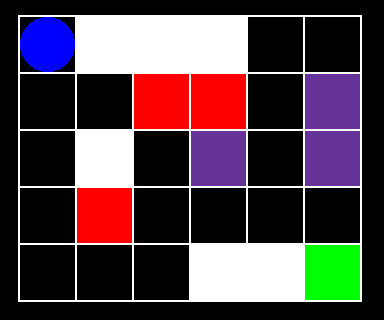

In [ ]:
imageio.mimsave('dangermaze_gradient.gif', frames, duration=0.25)
from IPython.display import Image
Image(filename="dangermaze_gradient.gif")